In [ ]:
html_str = """
<html>
  <head>
    <title>안녕하세요</title>
  </head>
  <body>
    <div id="container">
      <p class='p1'>hello</p>
      <p>Bye</p>
    </div>
  </body>
</html>"""


html 문자열을 파이썬에서 다뤄야 한다.
  - HTML 문자열을 엘리먼트 객체화 해서 파이썬에서 객체로 다룰 수 있어야 한다.
    - **BeautifulSoup**을 이용해서 HTML 문자열을 엘리먼트 객체로 바꿔줄 수 있다!

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(html_str, 'html.parser')
# 문자열을 DOM화 시키겠다!(파싱) 위에는 그냥 문자열 우리눈엔 똑같이보이지만
soup


<html>
<head>
<title>안녕하세요</title>
</head>
<body>
<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>
</body>
</html>

In [ ]:
type(soup) # 그냥 문자열은 아님

bs4.BeautifulSoup

# 1. find 메소드⭐⭐를 사용해 추출하는 방법
- find("태그명","속성 값 딕셔너리") : 한 개의 엘리먼트만 찾기
  - 리스트형태로 여러 개의 엘리먼트가 있는 경우에는 제일 먼저 등장한 엘리먼트만 찾아진다.
- find_all("태그명","속성 값 딕셔너리") : 여러 개 찾기
  - 여러 개의 엘리먼트를 찾기 때문에 리스트로 찾아진다.

In [ ]:
# div 중에 id가 container인 것 찾기
soup.find("div",{"id":'container'})  # 속성값 딕셔너리⭐⭐


<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>

In [ ]:
soup.find("p",{"class":"p1"})

<p class="p1">hello</p>

In [ ]:
# 모든 p찾기
soup.find_all("p") # 여러개니까 리스트로나옴

[<p class="p1">hello</p>, <p>Bye</p>]

In [ ]:
p1 = soup.find("p",{"class":"p1"})
p1.text

# 놀랄만큼 쉽궁

'hello'

In [ ]:
p2 = soup.find_all("p")[1]
p2.text

#soup.find("p",{"class":""}) 클래스에 아무것도 안넣어도됨

'Bye'

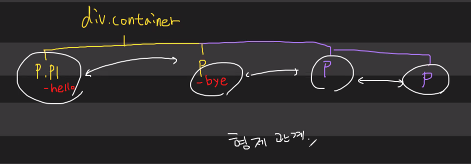

# 형제관계로 선택해보자!
- nextSibling : 동생선택
- previousSibling : 형선택

In [ ]:
# p1을 먼저 찾아줘!
p_p1 = soup.find("p",{"class":"p1"})
p_p1

<p class="p1">hello</p>

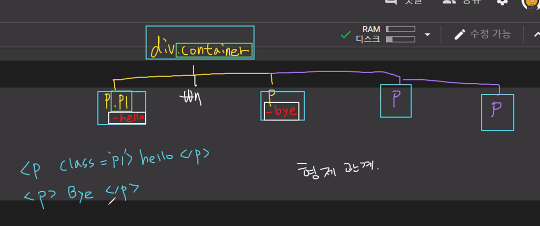

In [ ]:
# 숨겨진형제가 있었군..
p_p1.nextSibling

'\n'

In [ ]:
html_str

'\n<html>\n  <head>\n    <title>안녕하세요</title>\n  </head>\n  <body>\n    <div id="container">\n      <p class=\'p1\'>hello</p>\n      <p>Bye</p>\n    </div>\n  </body>\n</html>'

In [ ]:
p_p1.nextSibling.nextSibling

<p>Bye</p>

# 2. 선택자(selector) 메소드⭐⭐를 사용해 추출하는 방법
- select("선택자") : ***여러개 선택***
- select_one("선택자") : ***한개만 선택***

In [ ]:
# id는 1개니까 select_one
soup.select_one("#container")

<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>

In [ ]:
# 자식 선택자 사용
soup.select_one("#container > .p1").text

'hello'

In [ ]:
soup.select("p")

[<p class="p1">hello</p>, <p>Bye</p>]

상위 엘리먼트를 찾고 하위 엘리먼트를 찾을 수도 있다.

In [ ]:
container = soup.select_one("#container")
container

<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>

In [ ]:
container.find_all("p")

[<p class="p1">hello</p>, <p>Bye</p>]

# 속성 값 추출

In [ ]:
soup.select_one(".p1")["class"]

['p1']

In [ ]:
soup.select_one(".p1").get("class")

['p1']

# 네이버 환율 정보 가져오기 실습!
이건 내방법으로했고 밑에꺼 무신사 강사님방법!

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
URL = "https://finance.naver.com/marketindex/"

In [ ]:
response = requests.get(URL)
page = response.content  # 접속한 웹 사이트의 html코드 가져오기

In [ ]:
# 문자열을 DOM으로 만들어줘야대!
soup = BeautifulSoup(page, 'html.parser')

In [ ]:
soup.select("#exchangeList > li")

[<li class="on">
 <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
 <h3 class="h_lst"><span class="blind">미국 USD</span></h3>
 <div class="head_info point_dn">
 <span class="value">1,440.60</span>
 <span class="txt_krw"><span class="blind">원</span></span>
 <span class="change"> 1.40</span>
 <span class="blind">하락</span>
 </div>
 </a>
 <a class="graph_img" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdc', '', '', event);">
 <img alt="" height="153" src="https://ssl.pstatic.net/imgfinance/chart/marketindex/FX_USDKRW.png" width="295"/>
 </a>
 <div class="graph_info">
 <span class="time">2022.10.25 10:17</span>
 <span class="source">하나은행 기준</span>
 <span class="count">고시회차<span class="num">206</span>회</span>
 </div>
 </li>, <li class="">
 <a class="head jpy" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_JPYKRW" onclick="clickcr(this, 'fr1.jpyt

In [ ]:
a = soup.select("#exchangeList > li .h_lst")
col1 = [a[0].text, a[1].text, a[2].text, a[3].text]
col1

['미국 USD', '일본 JPY(100엔)', '유럽연합 EUR', '중국 CNY']

In [ ]:
b = soup.select("#exchangeList > li .value")
col2 = [b[0].text, b[1].text, b[2].text, b[3].text]
col2

['1,440.60', '966.88', '1,423.82', '195.75']

In [ ]:
c = soup.select("#exchangeList > li .blind")[2: :3]
col3 = [c[0].text, c[1].text, c[2].text, c[3].text]
col3

['하락', '상승', '상승', '하락']

In [ ]:
d = soup.select("#exchangeList > li .change")
col4 = [d[0].text, d[1].text, d[2].text, d[3].text]
col4

[' 1.40', '1.27', '8.06', ' 1.62']

In [ ]:
import pandas as pd
result = pd.DataFrame({
    "이름": col1,
    "가격": col2,
    "상승": col3,
    "상승률" : col4
})
result

,이름,가격,상승,상승률
0,미국 USD,"1,440.60",하락,1.40
1,일본 JPY(100엔),966.88,상승,1.27
2,유럽연합 EUR,"1,423.82",상승,8.06
3,중국 CNY,195.75,하락,1.62


# 무신사 예제

In [ ]:
# 만약 del태그가 있으면 할인가격 형제를 수집. 그게아니면 그냥 가격 가져오면됨

# python 조건문 특징
# 0, 0.0, [], {}, none = False

original_price = None # False
if original_price:
  print("트루")

else:
  print("폴스")


폴스


In [ ]:
# 무신사 들어갈때 봇을 브라우저에서 쇼핑하는 사용자로 속이기
# UserAgent
!pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c8dba47ee67ff13de47df014b3df6c65cecfe56ff4d133e7bab1123b7616e3a6
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [ ]:
from fake_useragent import UserAgent

# 크롬기반의 UserAgent를 무작위로 생성
UserAgent().chrome

'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'

In [ ]:
url = "https://www.musinsa.com/categories/item/001004"


In [ ]:
headers = {
    "user-agent": UserAgent().chrome
  
}

response = requests.get(url, headers=headers)
response

<Response [200]>

이미지주소 src가져오고
상세페이지 링크
타이틀
가격(할인후가격)
별점개수(별옆에숫자)


In [ ]:
page = response.content
soup = BeautifulSoup(page, 'html.parser') # dom화시키기

In [ ]:
fin_list = soup.select("#searchList > .li_box")

title_list = []
goods_link_list = []
img_src_list = []
price_list = []
stars_list = []

for fin in fin_list:
  title = fin.select_one(".list_info").text.strip().split("\n")[-1]
  goods_link = fin.select_one(".img-block").get("href")
  img_src = fin.select_one("img.lazyload.lazy")['data-original']


  if fin.select_one(".price").select_one("del") == True:
    pass
  else:
    price = fin.select_one(".price").text.split()[-1]

  stars = fin.select_one(".count").text


  title_list.append(title)
  goods_link_list.append(goods_link)
  img_src_list.append(img_src)
  price_list.append(price)
  stars_list.append(stars)

import pandas as pd
result = pd.DataFrame({
    "이름": title_list,
    "상품주소" :goods_link_list,
    "이미지주소": img_src_list,
    "가격": price_list,
    "별점" : stars_list
})

result

,이름,상품주소,이미지주소,가격,별점
0,(22FW) 2 TONE ARCH HOODIE GRAY,//www.musinsa.com/app/goods/2326935,//image.msscdn.net/images/goods_img/20220125/2...,"67,150원","3,785"
1,슬레이크 후드 네이비 HHHD3397,//www.musinsa.com/app/goods/2106707,//image.msscdn.net/images/goods_img/20210902/2...,"39,800원","3,966"
2,UNISEX LAUREL OVERSIZED HOODIE B...,//www.musinsa.com/app/goods/1211169,//image.msscdn.net/images/goods_img/20191103/1...,"48,300원","3,073"
3,에센셜 후드 스웻 셔츠 (MELANGE GREY),//www.musinsa.com/app/goods/2314616,//image.msscdn.net/images/goods_img/20220119/2...,"39,000원","2,601"
4,(22FW) 2 TONE ARCH HOODIE BLACK,//www.musinsa.com/app/goods/1742661,//image.msscdn.net/images/goods_img/20210111/1...,"67,150원","3,413"
...,...,...,...,...,...
85,World Flower Hoodie [Black],//www.musinsa.com/app/goods/2247224,//image.msscdn.net/images/goods_img/20211125/2...,"42,500원",216
86,미드나잇 후드 다크그레이 MJHD7447,//www.musinsa.com/app/goods/1738717,//image.msscdn.net/images/goods_img/20210107/1...,"41,700원","3,226"
87,스웰 후드 네이비 ISHD6193,//www.musinsa.com/app/goods/2773158,//image.msscdn.net/images/goods_img/20220906/2...,"43,600원",85
88,어센틱 로고 후디 블랙,//www.musinsa.com/app/goods/681070,//image.msscdn.net/images/goods_img/20171130/6...,"71,100원","2,510"


In [ ]:
# 타이틀
soup.select_one(".list_info").text.strip()

'(22FW) 2 TONE ARCH HOODIE GRAY'

In [ ]:
# 굿즈링크
soup.select_one(".img-block").get("href")

'//www.musinsa.com/app/goods/2326935'

In [ ]:
# 이미지
# soup.select_one(".lazyload").get("src") ⭐⭐⭐⭐노이미지 src안먹힘 내일할거
soup.select_one("img.lazyload.lazy")['data-original']


'//image.msscdn.net/images/goods_img/20220125/2326935/2326935_11_125.jpg'

In [ ]:
# 별점
soup.select_one(".count").text

'3,785'

In [ ]:
# 가격
a = soup.select_one(".price")

if a.select_one("del").text == True:
  print(soup.select_one(".price").text.split()[-1])

else:
  print(soup.select_one(".price").text.split()[-1])


67,150원


In [ ]:
# del 태그 찾아서 형제로 풀어보자 강사님풀이
original_price = soup.select_one("del")

if original_price:
  price = original_price.nextSibling
else:
  price = soup.select_one(".price").text.split()[-1]

In [ ]:
soup.select_one("del")

<del>79,000원</del>